In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [252]:
data=pd.read_csv('Empl.csv')
data

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [253]:
print(data.isnull().sum())

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64


In [254]:
data.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

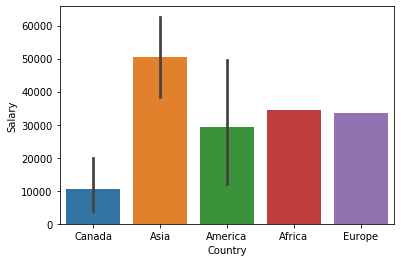

In [255]:
sns.barplot(x="Country",y="Salary",data=data)
plt.show()

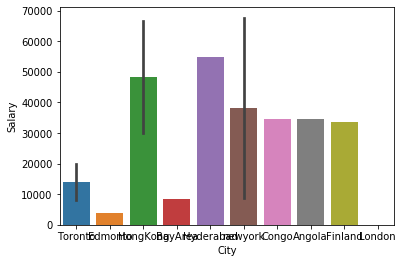

In [256]:
sns.barplot(x="City",y="Salary",data=data)
plt.show()

In [257]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['City']=data['City'].fillna(data['City'].mode()[0])
data.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [258]:
salary_grpby_city=data.groupby(["City"]).agg({'Salary':'mean'})

In [259]:
for index in salary_grpby_city.index:
    data.loc[data["City"]==index,["Salary"]]=data.loc[data["City"]==index,["Salary"]].fillna(salary_grpby_city.loc[index])

In [260]:
data.drop(columns=['Name', 'SNo'],axis=1, inplace=True)
data

,Age,City,Country,Salary
0,28.000000,Toronto,Canada,20000.000000
1,31.000000,Edmonto,Canada,3900.000000
2,34.000000,Toronto,Canada,8000.000000
3,26.000000,HongKong,Asia,66672.000000
4,30.000000,HongKong,America,39333.666667
5,32.421053,HongKong,Asia,30007.000000
6,43.000000,BayArea,America,8300.000000
7,38.000000,Hyderabad,Asia,54666.000000
8,50.000000,newyork,America,67666.000000
9,32.421053,newyork,America,8888.000000


In [305]:
data["Salary"].fillna(data["Salary"].mean(),inplace=True)
data

,Age,Salary,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,3.367296,20000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
1,3.465736,3900.000000,0,0,1,0,0,0,0,0,0,0,0,1,0
2,3.555348,8000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3.295837,66672.000000,0,0,0,0,1,0,0,0,0,0,1,0,0
4,3.433987,39333.666667,0,0,0,0,1,0,0,0,0,1,0,0,0
5,3.509186,30007.000000,0,0,0,0,1,0,0,0,0,0,1,0,0
6,3.784190,8300.000000,1,0,0,0,0,0,0,0,0,1,0,0,0
7,3.663562,54666.000000,0,0,0,0,0,1,0,0,0,0,1,0,0
8,3.931826,67666.000000,0,0,0,0,0,0,0,0,1,1,0,0,0
9,3.509186,8888.000000,0,0,0,0,0,0,0,0,1,1,0,0,0


In [262]:
import numpy as np
for col in data.columns:
    if data[col].dtype!="object":
        print("column name : "+col+" and skewness is : ",data[col].skew())
        if data[col].skew() > 0.55:
            data[col]=np.log1p(data[col])

column name : Age and skewness is :  1.034731645219974
column name : Salary and skewness is :  0.3169751648063996


In [263]:
data.skew()

Age       0.527799
Salary    0.316975
dtype: float64

In [264]:
data=pd.get_dummies(data,drop_first=True)
data

,Age,Salary,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
0,3.367296,20000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
1,3.465736,3900.000000,0,0,1,0,0,0,0,0,0,0,0,1,0
2,3.555348,8000.000000,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3.295837,66672.000000,0,0,0,0,1,0,0,0,0,0,1,0,0
4,3.433987,39333.666667,0,0,0,0,1,0,0,0,0,1,0,0,0
5,3.509186,30007.000000,0,0,0,0,1,0,0,0,0,0,1,0,0
6,3.784190,8300.000000,1,0,0,0,0,0,0,0,0,1,0,0,0
7,3.663562,54666.000000,0,0,0,0,0,1,0,0,0,0,1,0,0
8,3.931826,67666.000000,0,0,0,0,0,0,0,0,1,1,0,0,0
9,3.509186,8888.000000,0,0,0,0,0,0,0,0,1,1,0,0,0


In [265]:
x=data.drop(columns=["Salary"])
y=data["Salary"]

In [352]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.22)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [353]:
# Using DecisionTreeRegressor

In [354]:
dtr=DecisionTreeRegressor()
maxr2_score(dtr,x,y)

max r2 score corresponding to  94  is  0.9878984353106472


In [355]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [356]:
dtr=DecisionTreeRegressor()
hyperparametersrgr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersrgr, cv=5, scoring='r2')
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 1}


In [357]:
print("Mean r2 score for Random Forest Regressor after cross validation: ", cross_val_score(dtr,x,y,cv=2,scoring="r2").mean())
print("Standard deviation for Random Forest Regressor from mean r2 score is : ", cross_val_score(dtr,x,y,cv=2,scoring="r2").std())

Mean r2 score for Random Forest Regressor after cross validation:  -0.9612517571744922
Standard deviation for Random Forest Regressor from mean r2 score is :  0.23905220702043195


In [321]:
# Using KNeighborsRegressor

In [326]:
sc = StandardScaler()
x['Age','Salary,'] = sc.fit_transform(x)
x=pd.DataFrame(x)
x=pd.DataFrame((x),columns=x.columns)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.673825,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,3.162278,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
1,-0.140407,-0.218218,-0.218218,3.162278,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
2,0.345174,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,3.162278,-0.471405,-0.755929,-0.612372,2.121320,-0.316228
3,-1.061039,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
4,-0.312444,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,1.322876,-0.612372,-0.471405,-0.316228
5,0.095036,-0.218218,-0.218218,-0.316228,-0.218218,1.46385,-0.316228,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
6,1.585198,4.582576,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,-0.471405,1.322876,-0.612372,-0.471405,-0.316228
7,0.931551,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,3.162278,-0.218218,-0.316228,-0.471405,-0.755929,1.632993,-0.471405,-0.316228
8,2.385193,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,2.121320,1.322876,-0.612372,-0.471405,-0.316228
9,0.095036,-0.218218,-0.218218,-0.316228,-0.218218,-0.68313,-0.316228,-0.218218,-0.316228,2.121320,1.322876,-0.612372,-0.471405,-0.316228


In [358]:
knr=KNeighborsRegressor()
maxr2_score(knr,x,y)

max r2 score corresponding to  71  is  0.4584465857185638


In [359]:
knr=KNeighborsRegressor()
k_range = list(range(1,18))
hyperparametersknr=dict(n_neighbors=k_range)
gridknr=GridSearchCV(knr, hyperparametersknr, cv=5, scoring='r2')
gridknr.fit(x,y)
print(gridknr.best_params_)

{'n_neighbors': 17}


In [360]:
print("Mean r2 score for Random Forest Regressor after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Random Forest Regressor from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Random Forest Regressor after cross validation:  -53.92567768891566
Standard deviation for Random Forest Regressor from mean r2 score is :  108.20553224346118
